In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import pearsonr
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
pd.options.display.float_format = '{:.2f}'.format

In [3]:
df = pd.read_csv('C:/Users/Maria Tereza Boada/Desktop/VALORAÇÃO DE IMÓVEIS/INCRA - Relatório de Análise de Mercados de Terras/BASES/PPR - INCRA_v3 - BASE_BRASIL.csv')
df = df[(df.UF == "MT")]
df = df.sort_values('MRT')
df['VTI/ha (R$)'] = pd.to_numeric(df['VTI/ha (R$)'])
df['VTN/ha (R$)'] = pd.to_numeric(df['VTN/ha (R$)'])
df['MRT_NUMERO'] = df['MRT_NUMERO'].astype(int).astype(str)
df.head(10)

,DATA,UF,MRT_NUMERO,MRT,MUNICÍPIO,NIVEL_CATEGORICO,TIPOLOGIA,ATIVIDADE,DETALHAMENTO,LOCAL,VTI/ha (R$),VTN/ha (R$)
12942,2019,MT,1,MRT 1 - NOROESTE,ARIPUANÃ,2º NÍVEL CATEGÓRICO,VEGETAÇÃO NATIVA - COMPENSAÇÃO DE RESERVA LEGAL,VEGETAÇÃO NATIVA,VEGETAÇÃO NATIVA COMPENSAÇÃO DE RESERVA LEGAL,INDEFINIDO,600.81,600.81
12976,2019,MT,1,MRT 1 - NOROESTE,COLNIZA,2º NÍVEL CATEGÓRICO,PECUÁRIA - PASTAGEM DE BAIXO SUPORTE,PECUÁRIA,PECUÁRIA PASTAGEM DE BAIXO SUPORTE,INDEFINIDO,3342.17,3036.83
12977,2019,MT,1,MRT 1 - NOROESTE,RONDOLÂNDIA,2º NÍVEL CATEGÓRICO,PECUÁRIA - PASTAGEM DE BAIXO SUPORTE,PECUÁRIA,PECUÁRIA PASTAGEM DE BAIXO SUPORTE,INDEFINIDO,3342.17,3036.83
12978,2019,MT,1,MRT 1 - NOROESTE,COTRIGUAÇU,2º NÍVEL CATEGÓRICO,PECUÁRIA - PASTAGEM DE BAIXO SUPORTE,PECUÁRIA,PECUÁRIA PASTAGEM DE BAIXO SUPORTE,INDEFINIDO,3342.17,3036.83
12979,2019,MT,1,MRT 1 - NOROESTE,JURUENA,2º NÍVEL CATEGÓRICO,PECUÁRIA - PASTAGEM DE BAIXO SUPORTE,PECUÁRIA,PECUÁRIA PASTAGEM DE BAIXO SUPORTE,INDEFINIDO,3342.17,3036.83
12980,2019,MT,1,MRT 1 - NOROESTE,NOVA MONTE VERDE,2º NÍVEL CATEGÓRICO,PECUÁRIA - PASTAGEM DE BAIXO SUPORTE,PECUÁRIA,PECUÁRIA PASTAGEM DE BAIXO SUPORTE,INDEFINIDO,3342.17,3036.83
12981,2019,MT,1,MRT 1 - NOROESTE,ARIPUANÃ,1º NÍVEL CATEGÓRICO,PECUÁRIA,PECUÁRIA,INDEFINIDO,INDEFINIDO,4590.51,4169.64
12982,2019,MT,1,MRT 1 - NOROESTE,COLNIZA,1º NÍVEL CATEGÓRICO,PECUÁRIA,PECUÁRIA,INDEFINIDO,INDEFINIDO,4590.51,4169.64
12983,2019,MT,1,MRT 1 - NOROESTE,RONDOLÂNDIA,1º NÍVEL CATEGÓRICO,PECUÁRIA,PECUÁRIA,INDEFINIDO,INDEFINIDO,4590.51,4169.64
12984,2019,MT,1,MRT 1 - NOROESTE,COTRIGUAÇU,1º NÍVEL CATEGÓRICO,PECUÁRIA,PECUÁRIA,INDEFINIDO,INDEFINIDO,4590.51,4169.64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1128 entries, 12942 to 13921
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATA              1128 non-null   int64  
 1   UF                1128 non-null   object 
 2   MRT_NUMERO        1128 non-null   object 
 3   MRT               1128 non-null   object 
 4   MUNICÍPIO         1128 non-null   object 
 5   NIVEL_CATEGORICO  1128 non-null   object 
 6   TIPOLOGIA         1128 non-null   object 
 7   ATIVIDADE         1128 non-null   object 
 8   DETALHAMENTO      1128 non-null   object 
 9   LOCAL             1128 non-null   object 
 10  VTI/ha (R$)       1128 non-null   float64
 11  VTN/ha (R$)       1128 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 114.6+ KB


In [5]:
def consulta_bc(codigo_bcb):
    url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
    df = pd.read_json(url)
    df['data'] = pd.to_datetime(df['data'], dayfirst = True)
    return df

**Período de Atualização IPCA** <br>
Alterar a data aqui (observe se toda a base está com o mesmo ano - alguns estados tem mais de um ano!! - casos em que a 
Base do INCRA para o mesmo estado é dividida em partes como no Pará e RS onde o MRT 8 não foi atualizado e foram utilizados 
os valores do último relatório com MRT 8 e deve aqui ser atualizado pelo IPCA). <br>
A consulta sempre deverá trazer a data especificada abaixo até o último índice disponível:

In [6]:
#Verificando se existe mais de um ano na mesma base
df['DATA'].value_counts()

2019    1128
Name: DATA, dtype: int64

In [7]:
ipca = consulta_bc(433)
ipca = ipca[(ipca.data >= "2019-01-01")]
ipca.set_index('data', inplace=True)
ipca = ipca.cumsum(axis = 0)
ipca.tail(5)

,valor
data,
2021-11-01,17.57
2021-12-01,18.30
2022-01-01,18.84
2022-02-01,19.85
2022-03-01,21.47


In [8]:
fator_corr = ipca['valor'].max()
fator_corr = 1 + (fator_corr/100)
fator_corr

1.2147000000000001

In [9]:
df['VTI'] = df['VTI/ha (R$)'] * fator_corr 
df['VTN'] = df['VTN/ha (R$)'] * fator_corr 
df

,DATA,UF,MRT_NUMERO,MRT,MUNICÍPIO,NIVEL_CATEGORICO,TIPOLOGIA,ATIVIDADE,DETALHAMENTO,LOCAL,VTI/ha (R$),VTN/ha (R$),VTI,VTN
12942,2019,MT,1,MRT 1 - NOROESTE,ARIPUANÃ,2º NÍVEL CATEGÓRICO,VEGETAÇÃO NATIVA - COMPENSAÇÃO DE RESERVA LEGAL,VEGETAÇÃO NATIVA,VEGETAÇÃO NATIVA COMPENSAÇÃO DE RESERVA LEGAL,INDEFINIDO,600.81,600.81,729.80,729.80
12976,2019,MT,1,MRT 1 - NOROESTE,COLNIZA,2º NÍVEL CATEGÓRICO,PECUÁRIA - PASTAGEM DE BAIXO SUPORTE,PECUÁRIA,PECUÁRIA PASTAGEM DE BAIXO SUPORTE,INDEFINIDO,3342.17,3036.83,4059.73,3688.84
12977,2019,MT,1,MRT 1 - NOROESTE,RONDOLÂNDIA,2º NÍVEL CATEGÓRICO,PECUÁRIA - PASTAGEM DE BAIXO SUPORTE,PECUÁRIA,PECUÁRIA PASTAGEM DE BAIXO SUPORTE,INDEFINIDO,3342.17,3036.83,4059.73,3688.84
12978,2019,MT,1,MRT 1 - NOROESTE,COTRIGUAÇU,2º NÍVEL CATEGÓRICO,PECUÁRIA - PASTAGEM DE BAIXO SUPORTE,PECUÁRIA,PECUÁRIA PASTAGEM DE BAIXO SUPORTE,INDEFINIDO,3342.17,3036.83,4059.73,3688.84
12979,2019,MT,1,MRT 1 - NOROESTE,JURUENA,2º NÍVEL CATEGÓRICO,PECUÁRIA - PASTAGEM DE BAIXO SUPORTE,PECUÁRIA,PECUÁRIA PASTAGEM DE BAIXO SUPORTE,INDEFINIDO,3342.17,3036.83,4059.73,3688.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13925,2019,MT,9,MRT 9 - CAPITAL,CUIABÁ,1º NÍVEL CATEGÓRICO,AGRICULTURA - OLERICULTURA/CAIXARIA,AGRICULTURA,OLERICULTURA/CAIXARIA,INDEFINIDO,35333.33,32333.33,42919.40,39275.30
13926,2019,MT,9,MRT 9 - CAPITAL,VÁRZEA GRANDE,1º NÍVEL CATEGÓRICO,AGRICULTURA - OLERICULTURA/CAIXARIA,AGRICULTURA,OLERICULTURA/CAIXARIA,INDEFINIDO,35333.33,32333.33,42919.40,39275.30
13927,2019,MT,9,MRT 9 - CAPITAL,ACORIZAL,Média Geral,Uso Indefinido (Média geral),INDEFINIDO,INDEFINIDO,INDEFINIDO,9281.24,8462.52,11273.92,10279.42
13929,2019,MT,9,MRT 9 - CAPITAL,VÁRZEA GRANDE,Média Geral,Uso Indefinido (Média geral),INDEFINIDO,INDEFINIDO,INDEFINIDO,9281.24,8462.52,11273.92,10279.42


In [10]:
#Verificando se existem categorias em "ATIVIDADE_DETALHADA"
df['DETALHAMENTO'].value_counts()

INDEFINIDO                                       578
PECUÁRIA PASTAGEM DE BAIXO SUPORTE               141
PECUÁRIA PASTAGEM DE ALTO SUPORTE                141
AGRICULTURA DE ALTO RENDIMENTO                   130
AGRICULTURA DE MÉDIO RENDIMENTO                   79
PECUÁRIA PASTAGEM NATIVA                          33
VEGETAÇÃO NATIVA COMPENSAÇÃO DE RESERVA LEGAL      8
VEGETAÇÃO NATIVA MISTO                             8
VEGETAÇÃO NATIVA COM POTENCIAL MADEIREIRO          7
OLERICULTURA/CAIXARIA                              3
Name: DETALHAMENTO, dtype: int64

In [11]:
#Verificando se existem categorias em "LOCAL"
df['LOCAL'].value_counts()

INDEFINIDO            1106
BRASNORTE                2
NOVA BANDEIRANTE         2
BARRA DO GARÇAS          2
CÁCERES                  2
JUÍNA                    2
JUARA                    1
PRIMAVERA DO LESTE       1
APIACÁS                  1
COLNIZA                  1
CANARANA                 1
GAÚCHA DO NORTE          1
POXORÉU                  1
RONDONÓPOLIS             1
ITIQUIRA                 1
ALTO GARÇA               1
ROSÁRIO D'OESTE          1
NOVO SÃO JOAQUIM         1
Name: LOCAL, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1128 entries, 12942 to 13921
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATA              1128 non-null   int64  
 1   UF                1128 non-null   object 
 2   MRT_NUMERO        1128 non-null   object 
 3   MRT               1128 non-null   object 
 4   MUNICÍPIO         1128 non-null   object 
 5   NIVEL_CATEGORICO  1128 non-null   object 
 6   TIPOLOGIA         1128 non-null   object 
 7   ATIVIDADE         1128 non-null   object 
 8   DETALHAMENTO      1128 non-null   object 
 9   LOCAL             1128 non-null   object 
 10  VTI/ha (R$)       1128 non-null   float64
 11  VTN/ha (R$)       1128 non-null   float64
 12  VTI               1128 non-null   float64
 13  VTN               1128 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 132.2+ KB


In [13]:
df = df.drop(df.columns[[0,1,2,5,6,10,11]], axis=1)
df

,MRT,MUNICÍPIO,ATIVIDADE,DETALHAMENTO,LOCAL,VTI,VTN
12942,MRT 1 - NOROESTE,ARIPUANÃ,VEGETAÇÃO NATIVA,VEGETAÇÃO NATIVA COMPENSAÇÃO DE RESERVA LEGAL,INDEFINIDO,729.80,729.80
12976,MRT 1 - NOROESTE,COLNIZA,PECUÁRIA,PECUÁRIA PASTAGEM DE BAIXO SUPORTE,INDEFINIDO,4059.73,3688.84
12977,MRT 1 - NOROESTE,RONDOLÂNDIA,PECUÁRIA,PECUÁRIA PASTAGEM DE BAIXO SUPORTE,INDEFINIDO,4059.73,3688.84
12978,MRT 1 - NOROESTE,COTRIGUAÇU,PECUÁRIA,PECUÁRIA PASTAGEM DE BAIXO SUPORTE,INDEFINIDO,4059.73,3688.84
12979,MRT 1 - NOROESTE,JURUENA,PECUÁRIA,PECUÁRIA PASTAGEM DE BAIXO SUPORTE,INDEFINIDO,4059.73,3688.84
...,...,...,...,...,...,...,...
13925,MRT 9 - CAPITAL,CUIABÁ,AGRICULTURA,OLERICULTURA/CAIXARIA,INDEFINIDO,42919.40,39275.30
13926,MRT 9 - CAPITAL,VÁRZEA GRANDE,AGRICULTURA,OLERICULTURA/CAIXARIA,INDEFINIDO,42919.40,39275.30
13927,MRT 9 - CAPITAL,ACORIZAL,INDEFINIDO,INDEFINIDO,INDEFINIDO,11273.92,10279.42
13929,MRT 9 - CAPITAL,VÁRZEA GRANDE,INDEFINIDO,INDEFINIDO,INDEFINIDO,11273.92,10279.42


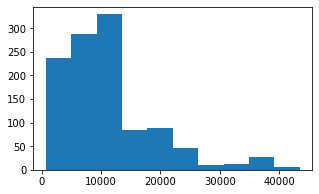

In [14]:
fig = plt.figure(figsize=(5, 3))
plt.hist(df['VTI'])
plt.show()

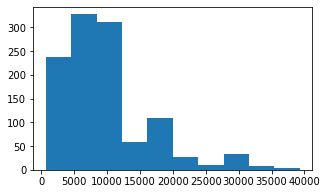

In [15]:
fig = plt.figure(figsize=(5, 3))
plt.hist(df['VTN'])
plt.show()

In [16]:
df[['VTI','VTN']].describe()

,VTI,VTN
count,1128.00,1128.00
mean,11154.74,9728.29
std,7729.60,6711.51
min,729.80,729.80
25%,6333.73,5499.02
50%,9780.95,8445.77
75%,13441.57,11368.74
max,43453.61,39275.30


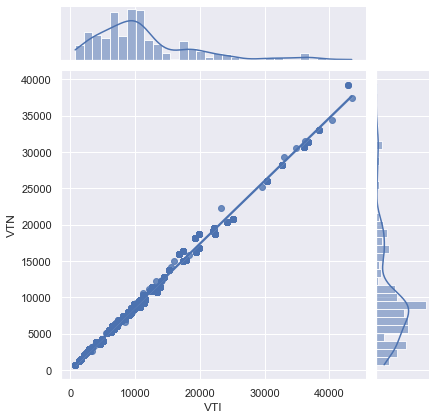

In [17]:
sns.set(rc={'figure.figsize':(10,5)})
sns.jointplot(x='VTI', y='VTN', data=df, kind='reg')

In [18]:
# Correlação
pearsonr(df['VTI'], df['VTN'])

(0.9970241649849256, 0.0)

<AxesSubplot:xlabel='VTI', ylabel='MRT'>

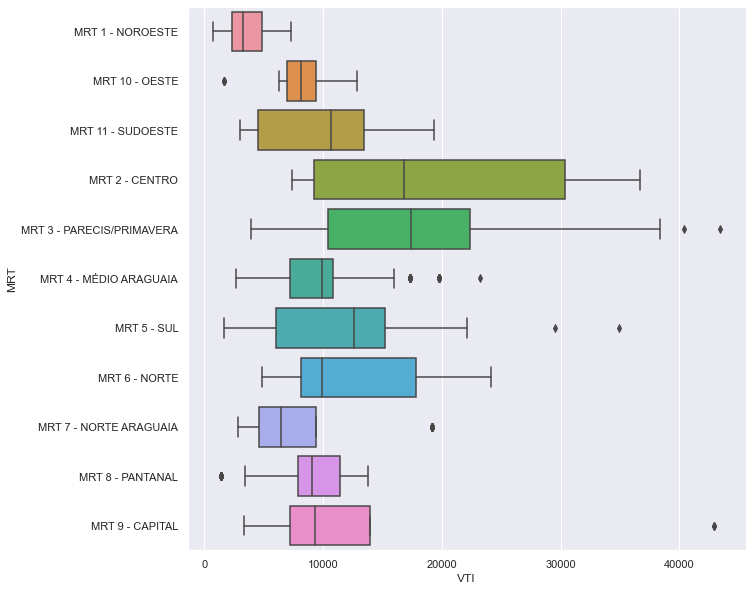

In [19]:
sns.set(rc={'figure.figsize':(10,10)})
sns.boxplot(x = df['VTI'],
            y = df['MRT'],
            width=0.8)

<AxesSubplot:xlabel='VTI', ylabel='MUNICÍPIO'>

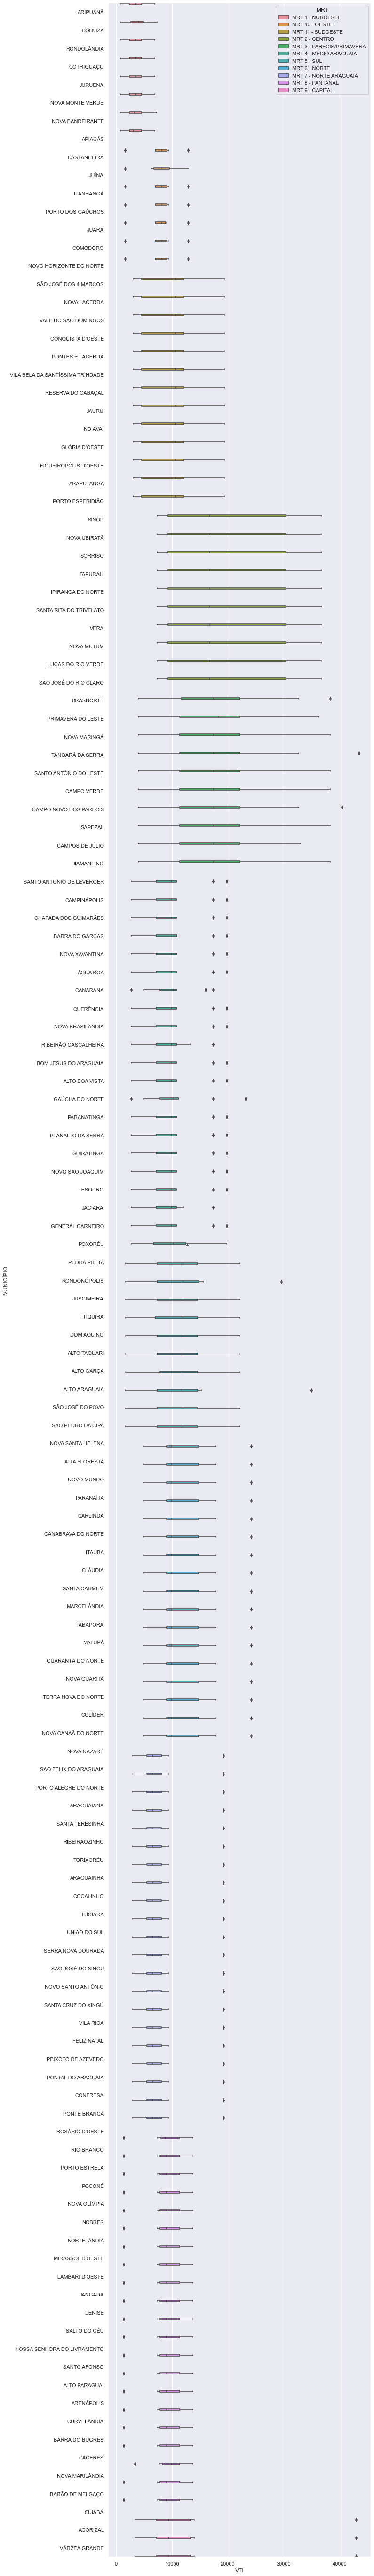

In [20]:
sns.set(rc={'figure.figsize':(10,100)})
sns.boxplot(x = df['VTI'],
            y = df['MUNICÍPIO'],
            hue = df['MRT'],
            width=1)

**OBS:** o MRT define melhor os valores dos imóveis que os municípios, por esse motivo, eliminei os municípios e deixei o MRT entre as variáveis preditoras.

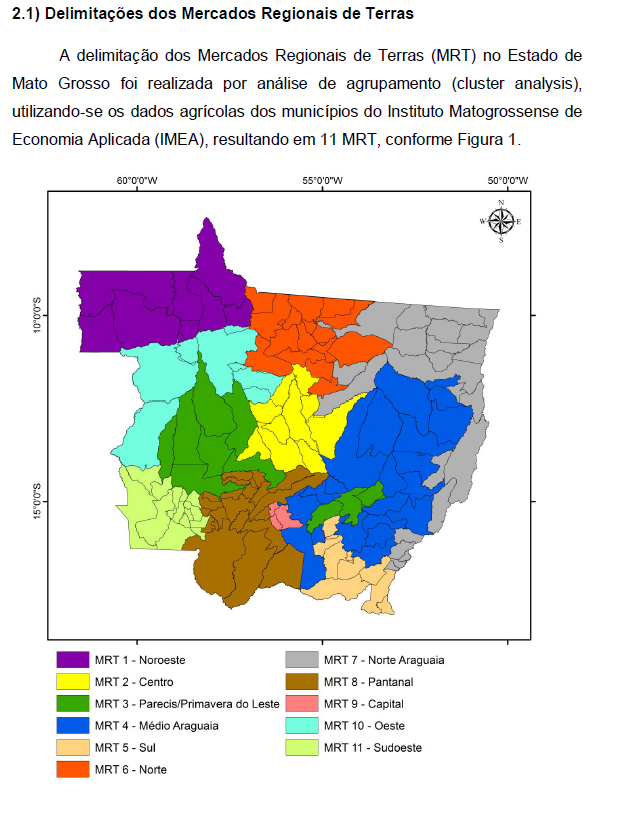

In [21]:
df = df.drop(df.columns[[1]], axis=1)

In [22]:
df

,MRT,ATIVIDADE,DETALHAMENTO,LOCAL,VTI,VTN
12942,MRT 1 - NOROESTE,VEGETAÇÃO NATIVA,VEGETAÇÃO NATIVA COMPENSAÇÃO DE RESERVA LEGAL,INDEFINIDO,729.80,729.80
12976,MRT 1 - NOROESTE,PECUÁRIA,PECUÁRIA PASTAGEM DE BAIXO SUPORTE,INDEFINIDO,4059.73,3688.84
12977,MRT 1 - NOROESTE,PECUÁRIA,PECUÁRIA PASTAGEM DE BAIXO SUPORTE,INDEFINIDO,4059.73,3688.84
12978,MRT 1 - NOROESTE,PECUÁRIA,PECUÁRIA PASTAGEM DE BAIXO SUPORTE,INDEFINIDO,4059.73,3688.84
12979,MRT 1 - NOROESTE,PECUÁRIA,PECUÁRIA PASTAGEM DE BAIXO SUPORTE,INDEFINIDO,4059.73,3688.84
...,...,...,...,...,...,...
13925,MRT 9 - CAPITAL,AGRICULTURA,OLERICULTURA/CAIXARIA,INDEFINIDO,42919.40,39275.30
13926,MRT 9 - CAPITAL,AGRICULTURA,OLERICULTURA/CAIXARIA,INDEFINIDO,42919.40,39275.30
13927,MRT 9 - CAPITAL,INDEFINIDO,INDEFINIDO,INDEFINIDO,11273.92,10279.42
13929,MRT 9 - CAPITAL,INDEFINIDO,INDEFINIDO,INDEFINIDO,11273.92,10279.42


In [23]:
# Criar variáveis dummies para cada variável qualitativa e excluir a primeira categoria de cada variável
df = pd.get_dummies(df)
df

,VTI,VTN,MRT_MRT 1 - NOROESTE,MRT_MRT 10 - OESTE,MRT_MRT 11 - SUDOESTE,MRT_MRT 2 - CENTRO,MRT_MRT 3 - PARECIS/PRIMAVERA,MRT_MRT 4 - MÉDIO ARAGUAIA,MRT_MRT 5 - SUL,MRT_MRT 6 - NORTE,...,LOCAL_INDEFINIDO,LOCAL_ITIQUIRA,LOCAL_JUARA,LOCAL_JUÍNA,LOCAL_NOVA BANDEIRANTE,LOCAL_NOVO SÃO JOAQUIM,LOCAL_POXORÉU,LOCAL_PRIMAVERA DO LESTE,LOCAL_RONDONÓPOLIS,LOCAL_ROSÁRIO D'OESTE
12942,729.80,729.80,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
12976,4059.73,3688.84,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
12977,4059.73,3688.84,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
12978,4059.73,3688.84,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
12979,4059.73,3688.84,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13925,42919.40,39275.30,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
13926,42919.40,39275.30,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
13927,11273.92,10279.42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
13929,11273.92,10279.42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [24]:
df.drop(['MRT_MRT 1 - NOROESTE', 'ATIVIDADE_INDEFINIDO', 'DETALHAMENTO_INDEFINIDO', 'LOCAL_INDEFINIDO'], axis=1, inplace=True)

In [25]:
df.columns

Index(['VTI', 'VTN', 'MRT_MRT 10 - OESTE', 'MRT_MRT 11 - SUDOESTE',
       'MRT_MRT 2 - CENTRO', 'MRT_MRT 3 - PARECIS/PRIMAVERA',
       'MRT_MRT 4 - MÉDIO ARAGUAIA', 'MRT_MRT 5 - SUL', 'MRT_MRT 6 - NORTE',
       'MRT_MRT 7 - NORTE ARAGUAIA', 'MRT_MRT 8 - PANTANAL',
       'MRT_MRT 9 - CAPITAL', 'ATIVIDADE_AGRICULTURA',
       'ATIVIDADE_AGRICULTURA E PECUÁRIA',
       'ATIVIDADE_AGRICULTURA E SILVICULTURA', 'ATIVIDADE_PECUÁRIA',
       'ATIVIDADE_PECUÁRIA E SILVICULTURA', 'ATIVIDADE_VEGETAÇÃO NATIVA',
       'DETALHAMENTO_AGRICULTURA DE ALTO RENDIMENTO',
       'DETALHAMENTO_AGRICULTURA DE MÉDIO RENDIMENTO',
       'DETALHAMENTO_OLERICULTURA/CAIXARIA',
       'DETALHAMENTO_PECUÁRIA PASTAGEM DE ALTO SUPORTE',
       'DETALHAMENTO_PECUÁRIA PASTAGEM DE BAIXO SUPORTE',
       'DETALHAMENTO_PECUÁRIA PASTAGEM NATIVA',
       'DETALHAMENTO_VEGETAÇÃO NATIVA COM POTENCIAL MADEIREIRO',
       'DETALHAMENTO_VEGETAÇÃO NATIVA COMPENSAÇÃO DE RESERVA LEGAL',
       'DETALHAMENTO_VEGETAÇÃO NATIVA MI

In [26]:
#Se ao invés de prever o VTI quisermos prever o VTN, trocar o y para y = df[['VTN']]
X = df.drop(columns=['VTI', 'VTN'])
y = df['VTI']

In [27]:
#Dividir a amostra em treino e validação
# random_state é o número aleatório usado para sortear as amostras. O seu uso é opcional.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 101)

In [28]:
# Regressão linear múltipla
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [29]:
# Intercepto do modelo (b0)
intercepto = lm.intercept_
'{:f}'.format(intercepto)

'8223.346047'

In [30]:
# Os coeficientes do modelo 
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df.round(3)

,Coefficient
MRT_MRT 10 - OESTE,591.50
MRT_MRT 11 - SUDOESTE,2097.72
MRT_MRT 2 - CENTRO,12305.71
MRT_MRT 3 - PARECIS/PRIMAVERA,11268.57
MRT_MRT 4 - MÉDIO ARAGUAIA,2401.03
MRT_MRT 5 - SUL,5163.87
MRT_MRT 6 - NORTE,3278.36
MRT_MRT 7 - NORTE ARAGUAIA,1181.27
MRT_MRT 8 - PANTANAL,1336.82
MRT_MRT 9 - CAPITAL,4044.10


In [31]:
#Modelo de regressão linear múltipla
X_ = sm.add_constant(X_train)
model = sm.OLS(y_train, X_).fit()
#results = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VTI   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     92.21
Date:                Thu, 28 Apr 2022   Prob (F-statistic):          1.55e-280
Time:                        14:54:55   Log-Likelihood:                -8600.5
No. Observations:                 902   AIC:                         1.728e+04
Df Residuals:                     861   BIC:                         1.748e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [32]:
X_t = sm.add_constant(X_test)

In [33]:
# Calculando o valor predito da variável resposta na amostra treino e teste
y_train_pred = model.predict(X_)
y_test_pred  = model.predict(X_t)

In [34]:
y_train_pred

13341   18136.53
13412    6970.19
13092   20529.05
13921   11955.89
13454   13387.22
          ...   
13329    9213.06
13802    9044.73
13969   18482.32
13450   13387.22
13624    5697.48
Length: 902, dtype: float64

In [35]:
y_test_pred

13821    9248.61
13139   19180.36
13390   10624.37
13704    9404.62
13373   20291.85
          ...   
14056   10009.51
13219    2469.39
13924   42919.40
13964    7403.53
12952      68.36
Length: 226, dtype: float64

In [36]:
# Medidas de erro na amostra treino
me1   = round((y_train-y_train_pred).mean(),2)
mae1  = (mean_absolute_error(y_train, y_train_pred)).round(2)
mse1  = (mean_squared_error(y_train, y_train_pred)).round(2)
rmse1  = (np.sqrt(mean_squared_error(y_train, y_train_pred))).round(2)
mpe1  = round(((y_train - y_train_pred)/y_train).mean(),2)
mape1  =  round((mae1/y_train).mean(),2) 

In [37]:
# Medidas de erro na amostra teste
me2   = round((y_test-y_test_pred).mean(),2)
mae2  = (mean_absolute_error(y_test, y_test_pred)).round(2)
mse2  = (mean_squared_error(y_test, y_test_pred)).round(2)
rmse2  = (np.sqrt(mean_squared_error(y_test, y_test_pred))).round(2)
mpe2  = round(((y_test - y_test_pred)/y_test).mean(),2)
mape2  =  round((mae2/y_test).mean(),2) 

In [38]:
list1 = [me1, mae1,mse1,rmse1,mpe1, mape1]
list2 = [me2, mae2,mse2,rmse2,mpe2, mape2]
pd.DataFrame({"treino":list1, "teste": list2})
##COLOCAR NOMES NO INDEX

,treino,teste
0,0.00,18.43
1,2335.15,2396.58
2,11206992.66,11326126.77
3,3347.68,3365.43
4,-0.03,-0.03
5,0.35,0.40


**Conclusão dos resultados da amostra treino e teste** <br>
O rmse1 e rmse2 estão próximos, esse resultado mostra que o modelo ajustado na amostra treino tem desempenho semelhante na amostra teste. Ou seja, não tem problema de overfitting ou underfitting.

**Medidas de Erro:**<br>
<br>
**ME:** Média Simples do valor observado menos o valor previsto <br>
**MAE:** O erro médio absoluto, MAE (da sigla em inglês Mean Absolute Error), é calculado a partir da média dos erros absolutos, ou seja, utilizamos o módulo de cada erro para evitar a subestimação, isso porque, o valor é menos afetado por pontos especialmente extremos (outliers) <br>
**MSE:** O erro quadrático médio (MSE) é a média dos quadrados dos erros; quanto maiores forem os erros, maior será o MSE, e se os erros forem pequenos, ele também será pequeno. <br>
**RMSE:** A raiz quadrada do erro médio, RMSE (da sigla em inglês Root Mean Squared Error) é apenas a raiz quadrada do MSE, onde o erro retorna à unidade de medida do modelo (no MSE, a unidade de medida é quadrática). É frequentemente usada em séries temporais por ser mais sensível a erros maiores devido ao processo de quadratura que a produziu. <br>
**MPE:** Independente de escala, este erro resulta a taxa de erro em percentual entre o valor observado e o valor previsto.<br>
**MAPE:** Esta medida expressa a porcentagem média dos erros - previsto vs observado - (em valor absoluto) cometidos na previsão da série temporal; quanto menor esta medida, melhor será a previsão.<br>
**R²:** Square R é utilizado na estatística inferencial, este erro mede o quanto que uma variável explica sobre a variação da outra.

In [39]:
pd.DataFrame({'Actual value': y_train, 'Predicted value': round(y_train_pred,2), 'Erro': round(y_train - y_train_pred,2)})

,Actual value,Predicted value,Erro
13341,17312.83,18136.53,-823.70
13412,5991.81,6970.19,-978.38
13092,30372.58,20529.05,9843.53
13921,13988.64,11955.89,2032.75
13454,12606.35,13387.22,-780.87
...,...,...,...
13329,10796.44,9213.06,1583.37
13802,8403.65,9044.73,-641.08
13969,12876.97,18482.32,-5605.35
13450,12606.35,13387.22,-780.87


In [40]:
pd.DataFrame({'Actual value': y_test, 'Predicted value': round(y_test_pred,2), 'Erro': round(y_test - y_test_pred,2)})

,Actual value,Predicted value,Erro
13821,11091.74,9248.61,1843.13
13139,14451.67,19180.36,-4728.69
13390,10527.65,10624.37,-96.73
13704,6783.42,9404.62,-2621.20
13373,23181.59,20291.85,2889.74
...,...,...,...
14056,13441.57,10009.51,3432.06
13219,2659.57,2469.39,190.18
13924,42919.40,42919.40,-0.00
13964,8904.63,7403.53,1501.10


<AxesSubplot:xlabel='VTI'>

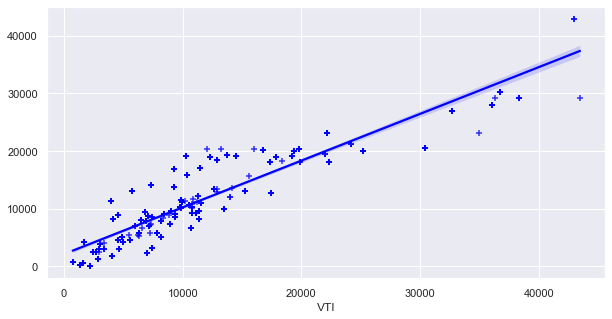

In [41]:
fig = plt.figure(figsize=(10, 5))
sns.regplot(x=y_train, y=y_train_pred, color='blue', marker='+')

<AxesSubplot:xlabel='VTI'>

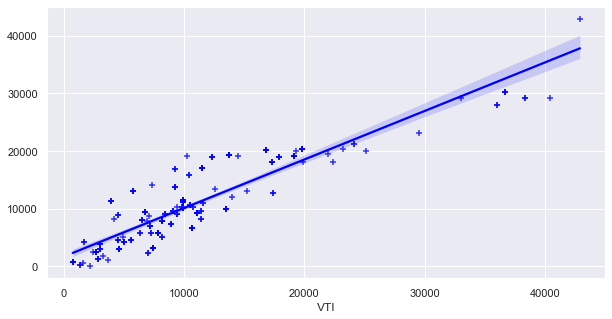

In [42]:
fig = plt.figure(figsize=(10, 5))
sns.regplot(x=y_test, y=y_test_pred, color='blue', marker='+')